# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Mount Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Import Data

## Data Training

In [3]:
trainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FGA/Final Project/Data_training.csv')
trainData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-01-03,295.0,295.0,292.5,295.0,198.727997,126180000
1,2005-01-04,295.0,302.5,295.0,300.0,202.096313,291730000
2,2005-01-05,300.0,315.0,300.0,307.5,207.148727,564730000
3,2005-01-06,310.0,310.0,302.5,307.5,207.148727,161150000
4,2005-01-07,305.0,305.0,292.5,295.0,198.727997,592910000


In [4]:
trainData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3721,2019-12-20,6680.0,6740.0,6610.0,6660.0,6002.917969,99453000
3722,2019-12-23,6680.0,6730.0,6650.0,6660.0,6002.917969,46558500
3723,2019-12-26,6660.0,6725.0,6660.0,6680.0,6020.944824,38188500
3724,2019-12-27,6670.0,6700.0,6670.0,6695.0,6034.464844,29945000
3725,2019-12-30,6680.0,6720.0,6670.0,6685.0,6025.451172,61168000


## Data Testing

In [5]:
testData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FGA/Final Project/Data_testing.csv')
testData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,6695.0,6780.0,6680.0,6690.0,6029.958008,49445000
1,2020-01-03,6750.0,6800.0,6725.0,6800.0,6129.104980,47755500
2,2020-01-06,6720.0,6750.0,6690.0,6735.0,6070.518066,27300000
3,2020-01-07,6735.0,6770.0,6730.0,6740.0,6075.024902,45022500
4,2020-01-08,6670.0,6745.0,6670.0,6680.0,6020.944336,53692500


In [6]:
testData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
969,2023-12-21,9300.0,9325.0,9250.0,9325.0,9114.956055,88116700
970,2023-12-22,9275.0,9350.0,9275.0,9325.0,9114.956055,64449600
971,2023-12-27,9375.0,9400.0,9325.0,9375.0,9163.830078,64464700
972,2023-12-28,9325.0,9425.0,9325.0,9400.0,9188.267578,70184600
973,2023-12-29,9425.0,9450.0,9350.0,9400.0,9188.267578,79903400


# 2. Pre-processing data

## Data Training

In [7]:
trainData["Date"] = pd.to_datetime(trainData['Close'])
trainData["Close"] = pd.to_numeric(trainData.Open,errors='coerce')

In [8]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3726 entries, 0 to 3725
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3726 non-null   datetime64[ns]
 1   Open       3726 non-null   float64       
 2   High       3726 non-null   float64       
 3   Low        3726 non-null   float64       
 4   Close      3726 non-null   float64       
 5   Adj Close  3726 non-null   float64       
 6   Volume     3726 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 203.9 KB


In [9]:
print(f"Dataframe data training contains stick prices between {trainData.Date.min()} {trainData.Date.max()}")

Dataframe data training contains stick prices between 1970-01-01 00:00:00.000000277 1970-01-01 00:00:00.000006755


In [10]:
trainData.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3726,3726.000000,3726.000000,3726.000000,3726.000000,3726.000000,3.726000e+03
mean,1970-01-01 00:00:00.000002088,2088.468867,2108.306495,2067.744230,2088.468867,1784.183621,1.053028e+08
min,1970-01-01 00:00:00.000000277,277.500000,282.500000,272.500000,277.500000,186.939072,0.000000e+00
25%,1970-01-01 00:00:00.000000640,640.000000,650.000000,630.000000,640.000000,487.824097,4.549275e+07
50%,1970-01-01 00:00:00.000001610,1610.000000,1620.000000,1590.000000,1610.000000,1320.191284,7.012875e+07
75%,1970-01-01 00:00:00.000002825,2827.500000,2860.000000,2805.000000,2827.500000,2418.145996,1.163700e+08
max,1970-01-01 00:00:00.000006755,6700.000000,6800.000000,6670.000000,6700.000000,6088.545410,1.949960e+09
std,NaN,1621.527724,1631.897144,1611.147313,1621.527724,1473.475242,1.267092e+08


In [11]:
trainData.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [12]:
trainData["Close"] = pd.to_numeric(trainData.Close,errors='coerce')
trainData = trainData.dropna()
trainData = trainData.iloc[:,4:5].values

In [13]:
trainData.shape

(3726, 1)

## Data Testing

In [14]:
testData["Date"] = pd.to_datetime(testData['Date'])
testData["Close"] = pd.to_numeric(testData.Close,errors='coerce')

In [15]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       974 non-null    datetime64[ns]
 1   Open       974 non-null    float64       
 2   High       974 non-null    float64       
 3   Low        974 non-null    float64       
 4   Close      974 non-null    float64       
 5   Adj Close  974 non-null    float64       
 6   Volume     974 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 53.4 KB


In [16]:
print(f"Dataframe data testing contains stick prices between {testData.Date.min()} {testData.Date.max()}")

Dataframe data testing contains stick prices between 2020-01-02 00:00:00 2023-12-29 00:00:00


In [17]:
testData.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,974,974.000000,974.000000,974.000000,974.000000,974.000000,9.740000e+02
mean,2021-12-30 22:16:30.554414592,7412.381930,7481.822382,7341.611910,7410.595483,6983.687871,8.973214e+07
min,2020-01-02 00:00:00,4450.000000,4800.000000,4325.000000,4430.000000,3992.931396,0.000000e+00
25%,2021-01-05 06:00:00,6420.000000,6471.250000,6351.250000,6410.000000,5924.133301,5.821892e+07
50%,2021-12-28 12:00:00,7400.000000,7475.000000,7325.000000,7375.000000,6947.797852,7.705595e+07
75%,2022-12-25 06:00:00,8600.000000,8693.750000,8550.000000,8600.000000,8202.416992,1.057043e+08
max,2023-12-29 00:00:00,9425.000000,9450.000000,9375.000000,9400.000000,9188.267578,7.228279e+08
std,NaN,1208.296995,1205.169403,1219.812893,1214.980092,1289.998164,5.727483e+07


In [18]:
testData.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [19]:
testData = testData.iloc[:,4:5]
y_test = testData.iloc[20:,0:].values

In [20]:
y_test.shape

(954, 1)

# 3. Feature Scaling

## Data Training

In [21]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(3726, 1)

## Data Testing

In [22]:
inputClose = testData.iloc[:,0:].values
inputClose_scaled = sc.fit_transform(inputClose)
inputClose_scaled.shape

(974, 1)

# 4. Training Data

## Splitting Data

In [23]:
X_train = []
y_train = []

for i in range (20, len(trainData)): # 60 = timestep
    X_train.append(trainData[i-20:i,0])
    y_train.append(trainData[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [24]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis

In [25]:
print("X train shape : ", X_train.shape)
print("y train shape : ", y_train.shape)

X train shape :  (3706, 20, 1)
y train shape :  (3706,)


In [26]:
X_test = []
length = len(testData)
timestep = 20

for i in range(timestep,length):
    X_test.append(inputClose_scaled[i-timestep:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [27]:
print("X test shape : ", X_test.shape)
print("y test shape : ", y_test.shape)

X test shape :  (954, 20, 1)
y test shape :  (954, 1)


## Build LSTM Model

In [28]:
model = Sequential()

model.add(LSTM(units=200, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=200, activation = "relu", return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=200, activation = "relu",return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=200, activation = "linear", return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(optimizer='adam', loss = "mean_squared_error")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 200)             │         161,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 200)             │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 200)             │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 200)                 │         320,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,124,201 (4.29 MB)

 Trainable params: 1,124,201 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

## Visualisasi Model

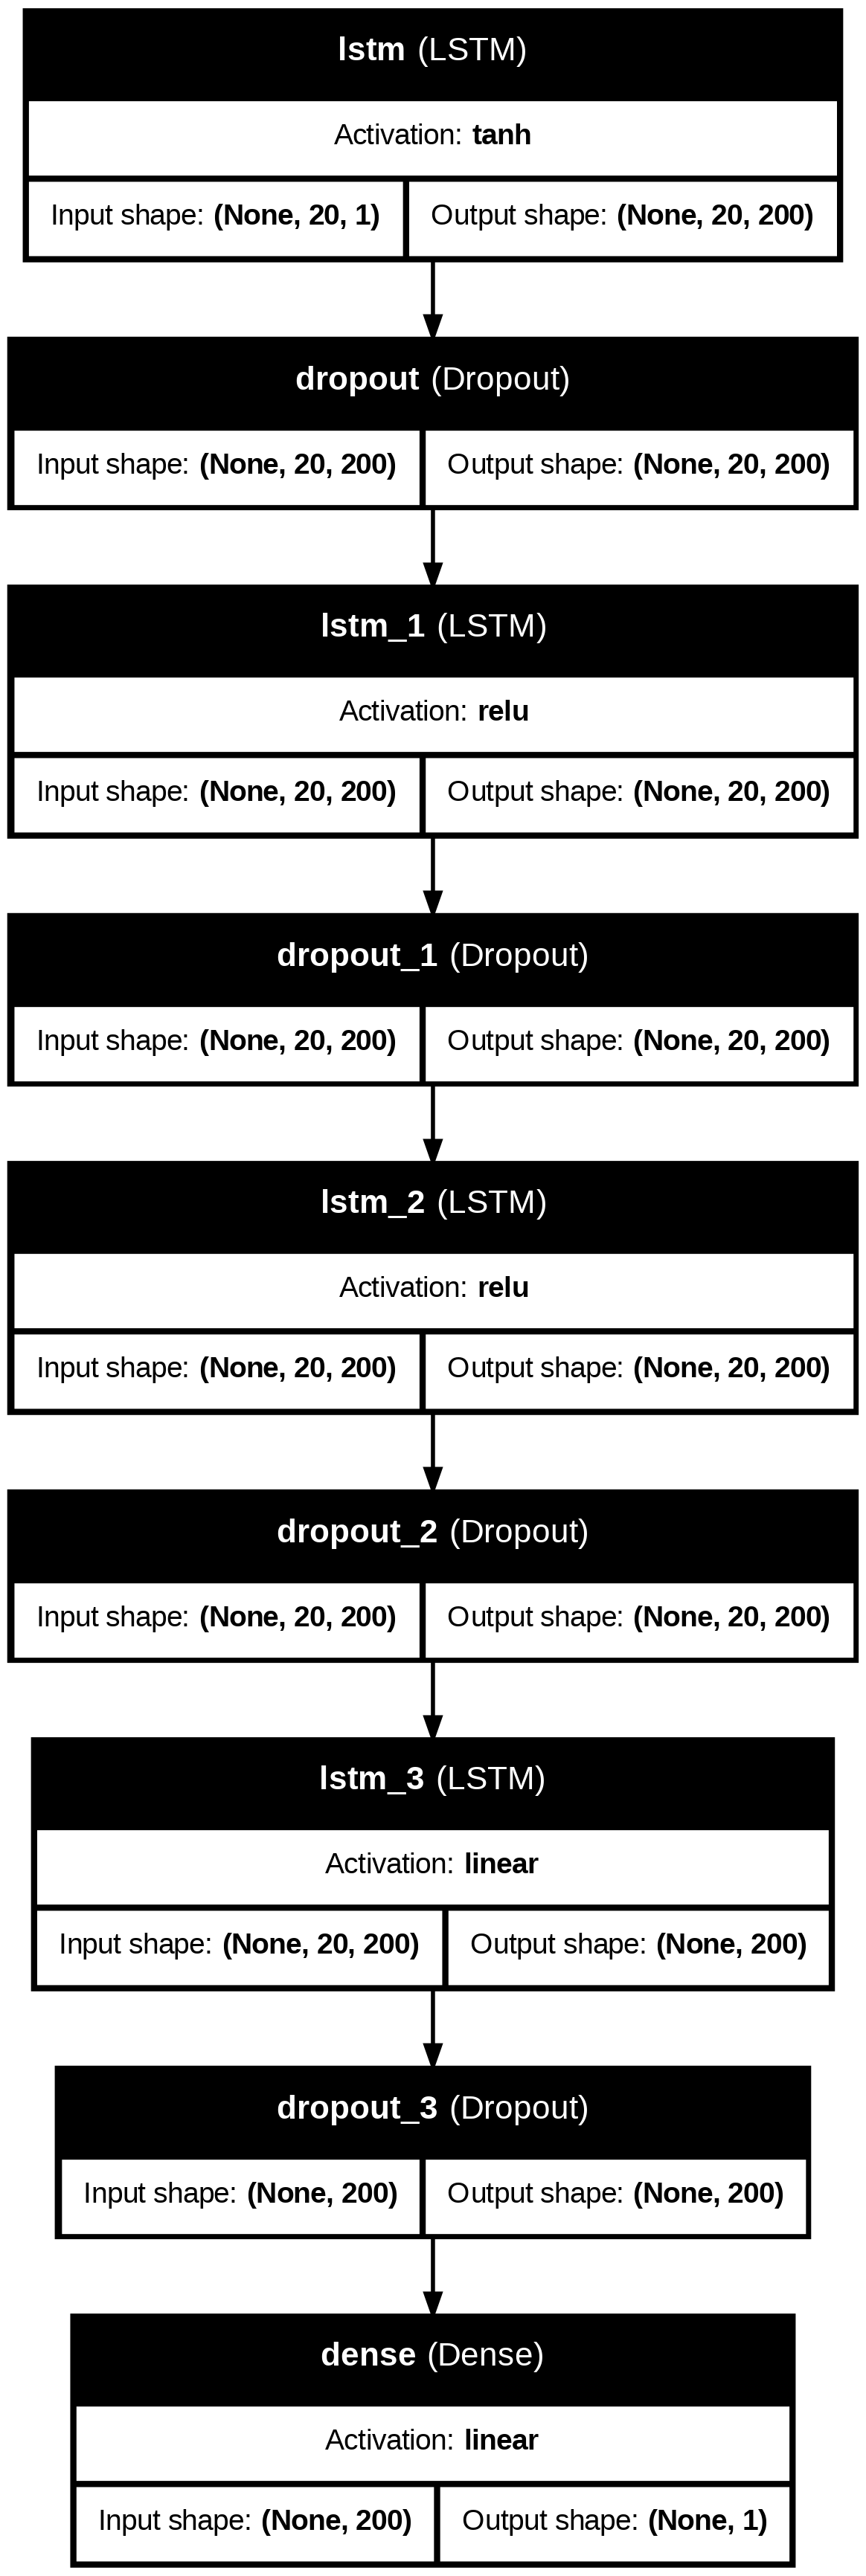

In [30]:
tf.keras.utils.plot_model(model,
                          show_shapes = True,
                          show_dtype = False,
                          show_layer_names = True,
                          expand_nested = True,
                          show_layer_activations = True)

# Fit Model

In [31]:
hist = model.fit(X_train, y_train,
                 epochs = 10,
                 batch_size = 64,
                 verbose = 1,
                 validation_data = (X_train, y_train))

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 32s 397ms/step - loss: 0.0320 - val_loss: 2.5994e-04
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 421ms/step - loss: 8.0657e-04 - val_loss: 4.7949e-04
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 38s 368ms/step - loss: 9.9940e-04 - val_loss: 2.3763e-04
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - loss: 5.7465e-04 - val_loss: 5.0198e-04
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 381ms/step - loss: 7.8537e-04 - val_loss: 5.7761e-04
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 393ms/step - loss: 6.0484e-04 - val_loss: 1.7110e-04
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 398ms/step - loss: 6.1675e-04 - val_loss: 1.7584e-04
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 377ms/step - loss: 5.9892e-04 - val_loss: 6.2938e-04
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 44s 429ms/step - loss: 6.4281e-04 - val_loss: 1.6117e-04
Epoch 10/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 361ms/step - loss: 6.1527e-04 - val_loss: 2.0724e-04


## Evaluation Model

In [32]:
model.metrics_names

['loss']

In [33]:
score_training = model.evaluate(X_train, y_train, verbose = 1)
print('Training loss :', score_training)

116/116 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 7.8859e-05
Training loss : 0.0002072426286758855


## Visualisasi Training Model Loss

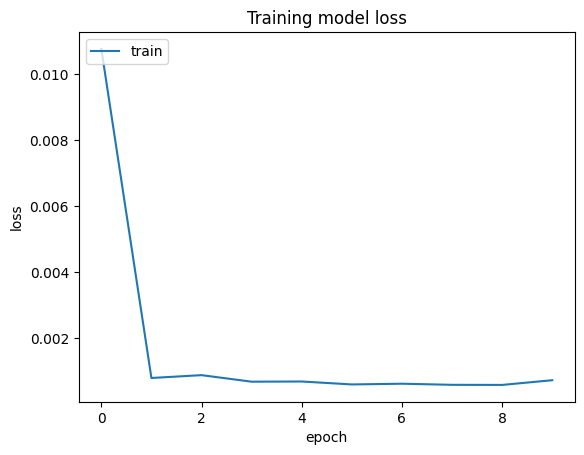

In [34]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Save Model LSTM

In [35]:
model.save("saved_model.h5")

# 5. Prediction Data

In [36]:
X_pred = model.predict(X_train)
X_pred.shape

116/116 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step


(3706, 1)

In [37]:
y_pred = model.predict(X_test)
y_pred.shape

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step


(954, 1)

## Feature Scaling

In [38]:
X_pred = sc.inverse_transform(X_pred)

In [39]:
predicted_price = sc.inverse_transform(y_pred)

# Visualisasi hasil prediksi dengan harga aktual

In [40]:
difference = predicted_price - y_test

In [41]:
print(y_test.shape)
print(predicted_price.shape)
print(difference.shape)

(954, 1)
(954, 1)
(954, 1)


In [42]:
Prediction = pd.DataFrame ({"nilai aktual" : y_test.flatten(),
                            "nilai prediksi " : predicted_price.flatten(),
                            "Difference " : difference.flatten()})
Prediction

,nilai aktual,nilai prediksi,Difference
0,6740.0,6814.584961,74.584961
1,6480.0,6822.052246,342.052246
2,6440.0,6824.265625,384.265625
3,6600.0,6825.442871,225.442871
4,6730.0,6822.794434,92.794434
...,...,...,...
949,9325.0,8787.983398,-537.016602
950,9325.0,8796.224609,-528.775391
951,9375.0,8809.813477,-565.186523
952,9400.0,8829.755859,-570.244141


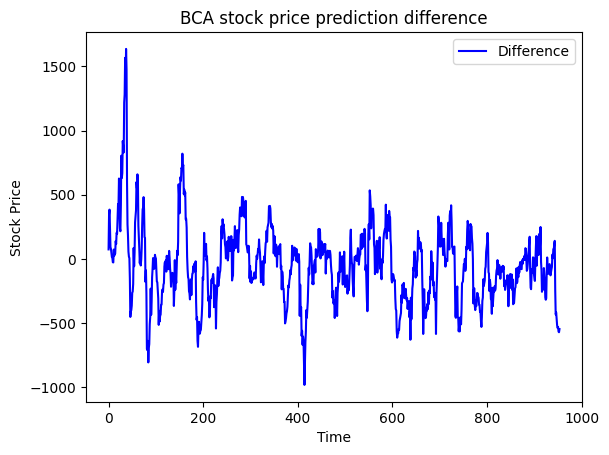

In [43]:
plt.plot(difference, color = "blue", label = "Difference")
plt.title('BCA stock price prediction difference')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.legend()
plt.show()

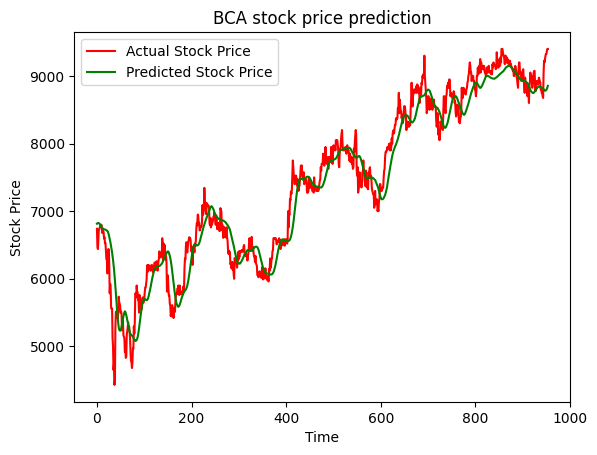

In [44]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('BCA stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# 6. Result and Conclusion

## RMSE ( Root Mean Squared Error )

In [45]:
import math
from sklearn.metrics import mean_squared_error

print("Train RMSE : ", math.sqrt(mean_squared_error(y_train, X_pred)))
print("Test RMSE : ", math.sqrt(mean_squared_error(y_test, predicted_price)))

Train RMSE :  5960.245918063967
Test RMSE :  296.10902807452413


## MSE ( Mean Squared Error )

In [46]:
# MSE Training
MSE_train = np.square(np.subtract(y_train, X_pred)).mean()
print("Train MSE : ", MSE_train)

# MSE Testing
MSE_test = np.square(np.subtract(y_test, predicted_price)).mean()
print("Testing MSE : ", MSE_test)

Train MSE :  35525146.572351076
Testing MSE :  87680.55650723931


## MAE ( Mean Absolute Error )

In [47]:
from sklearn.metrics import mean_absolute_error as mae

# MAE Training
mae_train = mae(y_train, X_pred)
print("MAE Training : " + str(mae_train))

# MAE Testing
mae_test = mae(y_test, predicted_price)
print("MAE Testing : " + str(mae_test))

MAE Training : 5833.9319347080245
MAE Testing : 219.05056781888757


**Catatan** : Dengan nilai error yang tinggi menunjukkan bahwa pergerakan harga saham saat covid yaitu mulai dari Januari 2020 tidak dapat diprediksi menggunakan data historis sebelumnya karena merupakan sebuah anomali dimana pergerakan harga saham saat covid menjadi sangat tidak menentu